In [45]:
#!pip install geopandas
#!pip install descartes
#!pip install geoplot
#!pip install cython  
#!pip install cartopy  
#!pip install adjusttext

In [46]:
import pandas as pd
import geopandas as gpd
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
#world.plot()

#### Importamos CABA.shp

In [47]:
df = gpd.read_file("barrios_badata.shp").drop(columns=["OBJETO"])
df_sinbarrios = gpd.read_file("barrios_badata.shp").drop(columns=["OBJETO","BARRIO"])
df_sinbarrios.COMUNA = df_sinbarrios.COMUNA.astype(int)
df_sinbarrios.COMUNA = df_sinbarrios.COMUNA.astype(str)
df.COMUNA = df.COMUNA.astype(int)
df.COMUNA =df.COMUNA.astype(str)
df.dtypes

BARRIO         object
COMUNA         object
PERIMETRO     float64
AREA          float64
geometry     geometry
dtype: object

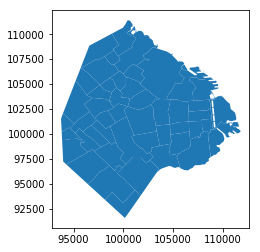

In [48]:
df.plot()

#### Importamos otro DF de Densidad Poblacional

In [49]:
df2= gpd.read_file("df2.csv")
df_densidad_poblacional = df2[["Comuna", "Densidad poblacional (hab/km²)" ]].iloc[1:]
df_densidad_poblacional.rename(columns = {'Comuna':'COMUNA','Densidad poblacional (hab/km²)':"DENSIDAD"}, inplace = True) 

### Tiramos un merge

In [50]:
caba_conbarrios = gpd.GeoDataFrame(pd.merge(df, df_densidad_poblacional))
caba_sinbarrios = gpd.GeoDataFrame(pd.merge(df_sinbarrios, df_densidad_poblacional))

#### Vemos de plotear la densidad de población

In [51]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
caba_conbarrios.groupby(['COMUNA', 'DENSIDAD',"BARRIO"])

### Mapeamos densidad de población

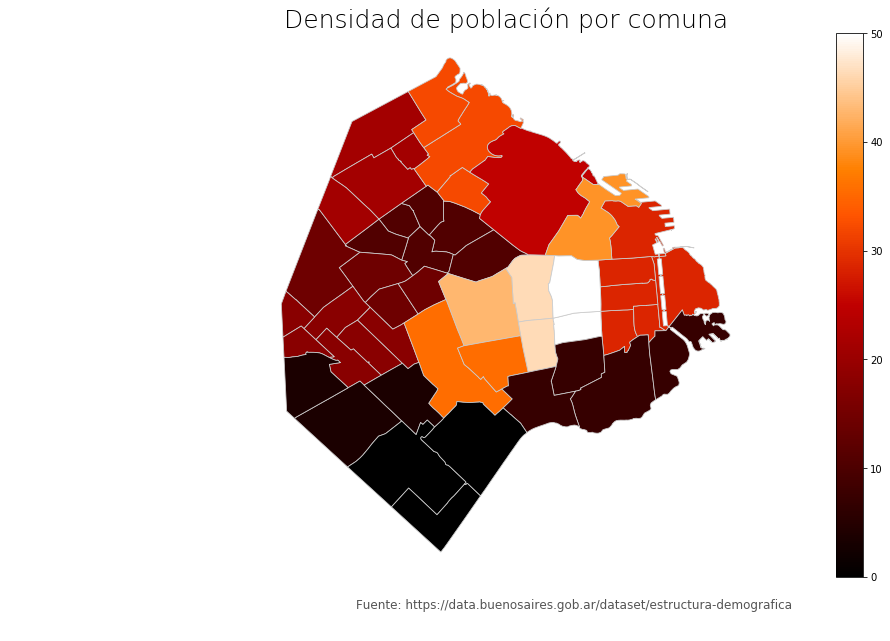

In [53]:
# set the value column that will be visualised
variable = 'DENSIDAD'# set the range for the choropleth values
vmin, vmax = 0, 50# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Densidad de población por comuna', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/estructura-demografica', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='gist_heat', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
caba_conbarrios.plot(column=variable, cmap="gist_heat", linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("map.png", dpi=300)

### Varones y Mujeres por Comuna

In [75]:
# Importamos el df y lo retocamos
vymc= pd.read_csv("df2.csv")
vymc = vymc[["Poblacion total", "Varon", "Mujer"]].iloc[1:]
vymc["Poblacion total"] = vymc["Poblacion total"].str.replace(".", "")
vymc["Varon"] = vymc["Varon"].str.replace(".", "")
vymc["Mujer"] = vymc["Mujer"].str.replace(".", "")
vymc["COMUNA"] = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
vymc = vymc.astype(int)
vymc["COMUNA"] = vymc["COMUNA"].astype(str)

In [76]:
# Porcentaje de varones y mujeres por comuna
ivarones = (vymc.Varon/vymc["Poblacion total"])*100
imujeres= (vymc.Mujer/vymc["Poblacion total"])*100
vymc["Porcentaje de varones"] = ivarones
vymc["Porcentaje de mujeres"] = imujeres
vymc = vymc[['COMUNA','Poblacion total', 'Varon', 'Mujer', 'Porcentaje de varones',
       'Porcentaje de mujeres']]

In [77]:
vymc_entero = gpd.GeoDataFrame(pd.merge(caba_conbarrios, vymc))
vymc_entero
vymc_entero

,BARRIO,COMUNA,PERIMETRO,AREA,geometry,DENSIDAD,Poblacion total,Varon,Mujer,Porcentaje de varones,Porcentaje de mujeres
0,CHACARITA,15,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10...",12.738,182445,85372,97073,46.793280,53.206720
1,PATERNAL,15,7087.513295,2.229829e+06,"POLYGON ((99791.104 103628.888, 99787.132 1036...",12.738,182445,85372,97073,46.793280,53.206720
2,VILLA CRESPO,15,8131.857075,3.615978e+06,"POLYGON ((103627.714 103487.358, 103517.533 10...",12.738,182445,85372,97073,46.793280,53.206720
3,PARQUE CHAS,15,4531.253396,1.385412e+06,"POLYGON ((99310.478 104639.728, 99310.161 1046...",12.738,182445,85372,97073,46.793280,53.206720
4,AGRONOMIA,15,6556.167772,2.122169e+06,"POLYGON ((98732.576 103788.842, 98662.518 1035...",12.738,182445,85372,97073,46.793280,53.206720
5,VILLA ORTUZAR,15,5684.995211,1.853802e+06,"POLYGON ((100252.557 105693.880, 100282.111 10...",12.738,182445,85372,97073,46.793280,53.206720
6,VILLA DEL PARQUE,11,7705.389797,3.399596e+06,"POLYGON ((97128.440 101597.513, 97112.315 1015...",13.460,190046,89720,100326,47.209623,52.790377
7,VILLA SANTA RITA,11,5757.752335,2.153691e+06,"POLYGON ((98292.432 100552.599, 98217.033 1005...",13.460,190046,89720,100326,47.209623,52.790377
8,VILLA GRAL. MITRE,11,6290.440561,2.162275e+06,"POLYGON ((99257.174 101135.036, 99236.854 1011...",13.460,190046,89720,100326,47.209623,52.790377
9,VILLA DEVOTO,11,11562.006800,6.404481e+06,"POLYGON ((95872.033 101701.919, 95857.432 1016...",13.460,190046,89720,100326,47.209623,52.790377


#### Porcentaje de varones por Comuna

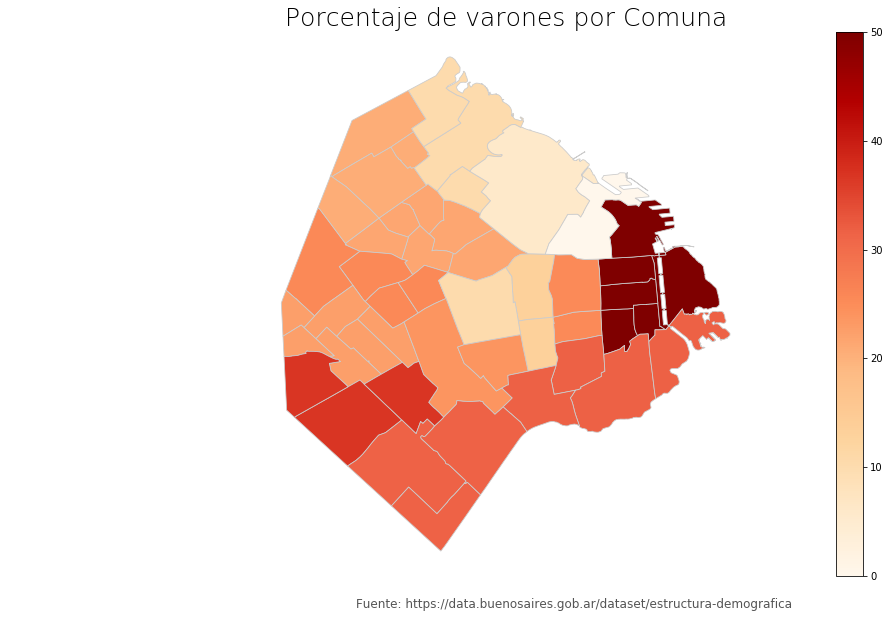

In [57]:
# set the value column that will be visualised
variable = 'Porcentaje de varones'# set the range for the choropleth values
vmin, vmax = 0, 50# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Porcentaje de varones por Comuna', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/estructura-demografica', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= 'OrRd' , norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
vymc_entero.plot(column=variable, cmap="OrRd", linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("porcentajedevaronesporcomuna.png", dpi=300)

#### Porcentaje de mujeres por comuna

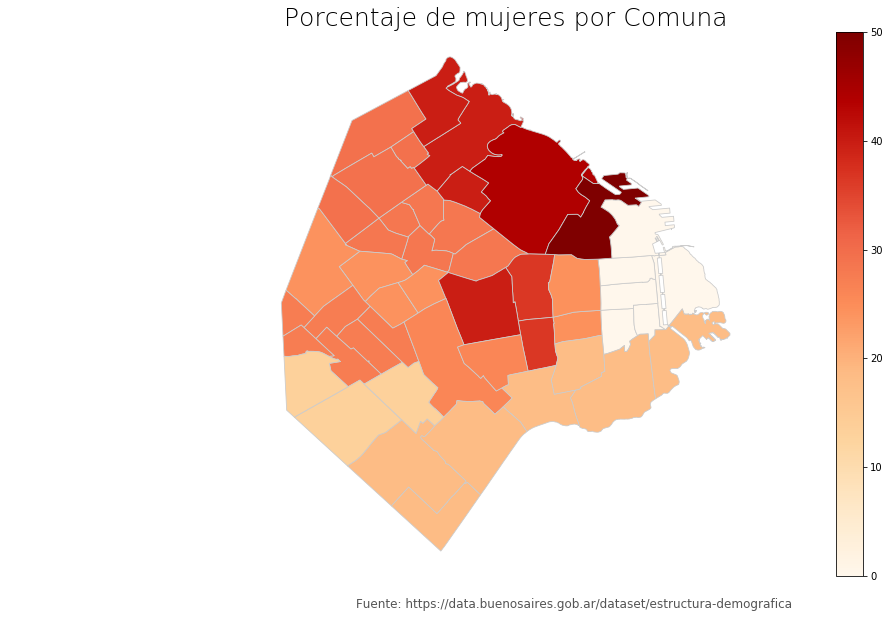

In [58]:
# set the value column that will be visualised
variable = 'Porcentaje de mujeres'# set the range for the choropleth values
vmin, vmax = 0, 50# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Porcentaje de mujeres por Comuna', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/estructura-demografica', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= "OrRd" , norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
vymc_entero.plot(column=variable, cmap= "OrRd" , linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("porcentajedemujeresporcomuna.png", dpi=300)

### Vemos de plotear participantes por Comuna

In [100]:
porbarrios = gpd.read_file("dfencuestadosporbarrio.csv").drop(columns = ["geometry"])
porbarrios = porbarrios.apply(lambda x: x.astype(str).str.upper())
porbarrios.rename(columns = {'index':'BARRIO'}, inplace = True) 
porbarrios.dtypes

BARRIO             object
barrio_completo    object
dtype: object

In [101]:
barrio = gpd.read_file("barrios_badata.shp").drop(columns=["OBJETO"])
barrio.head(5)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((104625.143 101679.935, 104629.994 10..."


In [102]:
vecescompletadaporbarrio = gpd.GeoDataFrame(pd.merge(barrio, porbarrios))

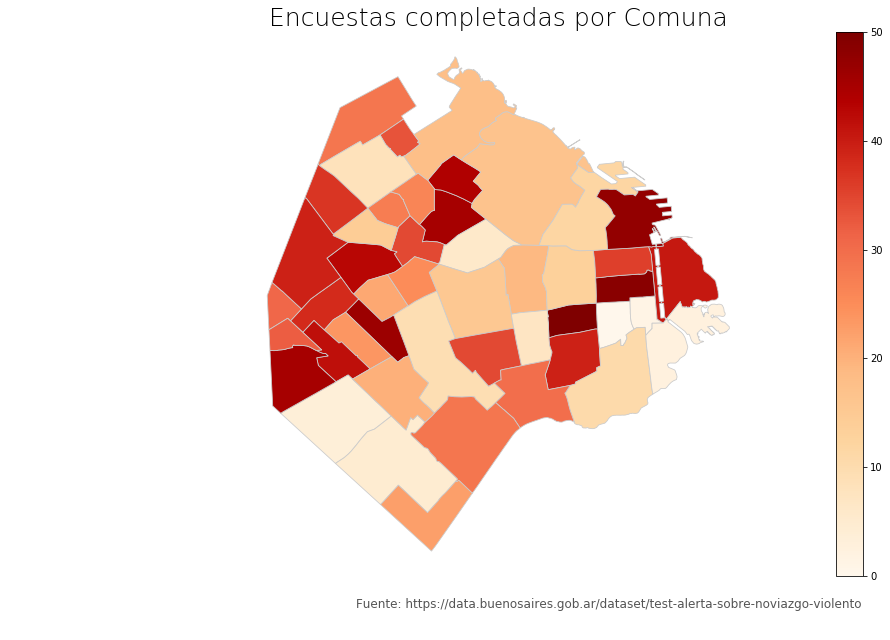

In [104]:
# set the value column that will be visualised
variable = 'barrio_completo'# set the range for the choropleth values
vmin, vmax = 0, 50# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Encuestas completadas por Comuna', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/test-alerta-sobre-noviazgo-violento', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= "OrRd" , norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
vecescompletadaporbarrio.plot(column="barrio_completo", cmap= "OrRd" , linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("encuestascompletasporcomuna.png", dpi=300)

### Contextily

In [143]:
import contextily as ctx

  # Proveedores de mapas
#ctx.providers.keys()
#ctx.providers.NASAGIBS.keys()
#type(ctx.providers.NASAGIBS.ViirsEarthAtNight2012)

In [115]:
cidm = gpd.read_file("centros-integrales-de-la-mujer.shp")
cidm = cidm.to_crs(epsg=3857)
cidm.head(5)

,long,lat,CIM,calle,calle_nro,piso,telefono,mail,atencion,barrio,comuna,codigo_pos,codigo_p_1,geometry
0,-58.485759,-34.646417,Alfonsina Storni,DIRECTORIO AV.,4468,None,3981-0802,cim_alfonsinastorni@buenosaires.gob.ar,Lunes a viernes de 9 a 16,Parque Avellaneda,Comuna 9,1407,C1407HGR,POINT (-6510604.911 -4115933.841)
1,-58.398846,-34.596667,Alicia Moreau,"URIBURU JOSE E., PRES.",1022,None,"4823-1165, interno 104",cim_amoreau@buenosaires.gob.ar,Lunes a viernes de 10 a 17,Recoleta,Comuna 2,1114,C1114AAF,POINT (-6500929.800 -4109203.994)
2,-58.411872,-34.611991,Arminda Aberastury,"YRIGOYEN, HIPOLITO",3202,None,4956-1768,cim_aberastury@buenosaires.gob.ar,Lunes a viernes de 9 a 16,Balvanera,Comuna 3,1207,C1207ABR,POINT (-6502379.847 -4111276.492)
3,-58.482743,-34.632707,Carolina Muzzilli,"FLORES, VENANCIO, GRAL.",3929,None,4672-2537,cim_carolinamuzzilli@buenosaires.go.ar,Lunes a viernes de 10 a 17,Floresta,Comuna 10,1407,C1407ECM,POINT (-6510269.171 -4114078.841)
4,-58.456590,-34.629444,Dignxs de Ser,LAUTARO,188,None,4634-1410,cim_dignxsdeser@buenosaires.gob.ar,Lunes a viernes de 13 a 20,Flores,Comuna 7,1406,C1406DKD,POINT (-6507357.832 -4113637.394)


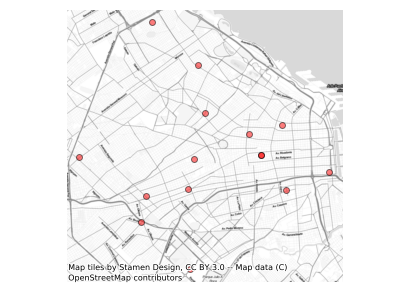

In [125]:
ax = cidm.plot(figsize=(5,5), alpha=0.5, color= "red" , edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

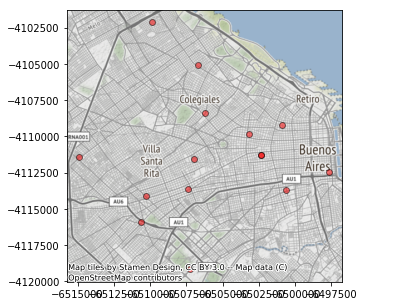

In [124]:
ax = cidm.plot(figsize=(5, 5), color = "red", alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

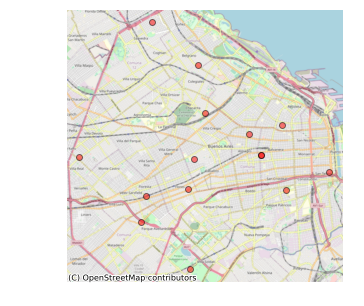

In [127]:
ax = cidm.plot(figsize=(5, 5), color = "red" ,alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()